In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset


In [68]:
adas_df = pd.read_csv("C:/Users/ASUS/Documents/vscode/ADAS_Sensor_Event_Analysis/ADAS_Triage_Mock_Data.csv")


# 3. Basic Overview

In [69]:
print(adas_df.head())
print(adas_df.describe())
print(adas_df.info())

  Triage_ID Vehicle_ID  Speed_kmph Brake_Applied   Curve_Type VRU_Detected  \
0   TID1000     VID319       49.97           Yes      S-curve           No   
1   TID1001     VID652       43.62           Yes   Left Curve          Yes   
2   TID1002     VID235       51.48            No  Right Curve           No   
3   TID1003     VID840       60.23            No     Straight           No   
4   TID1004     VID684       42.66            No      S-curve          Yes   

            Issue_Type   Location  Triage_Time_Min  
0           Late Brake    Chennai            26.20  
1             No Brake  Bangalore            21.09  
2        Sensor Glitch  Hyderabad            36.11  
3  False VRU Detection  Hyderabad            18.81  
4        Sensor Glitch  Ahmedabad            27.62  
       Speed_kmph  Triage_Time_Min
count  300.000000       300.000000
mean    44.944567        24.975000
std      9.842099         4.945368
min     12.590000        10.560000
25%     38.167500        21.455000
50%

# 4. Exploratory Data Analysis (EDA)


In [70]:
sns.set(style="whitegrid")

### Speed Distribution


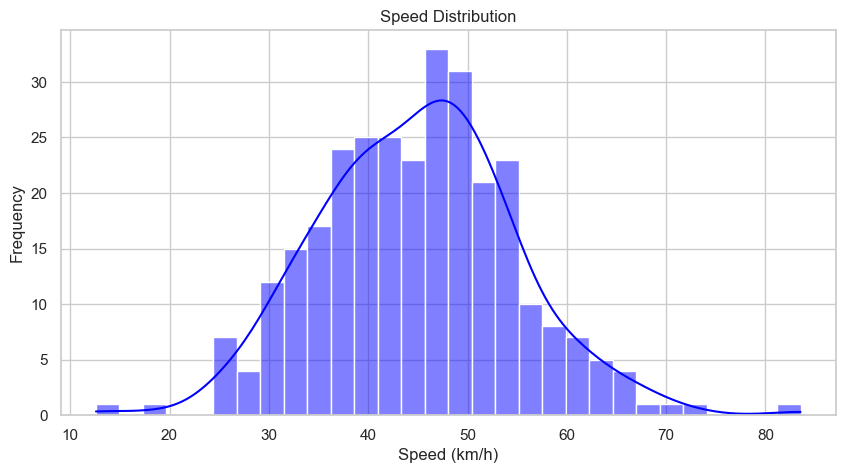

In [71]:
plt.figure(figsize=(10, 5))
sns.histplot(adas_df['Speed_kmph'], bins=30, kde=True, color='blue')
plt.title('Speed Distribution')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

### Obstacle Distance vs Brake Signal


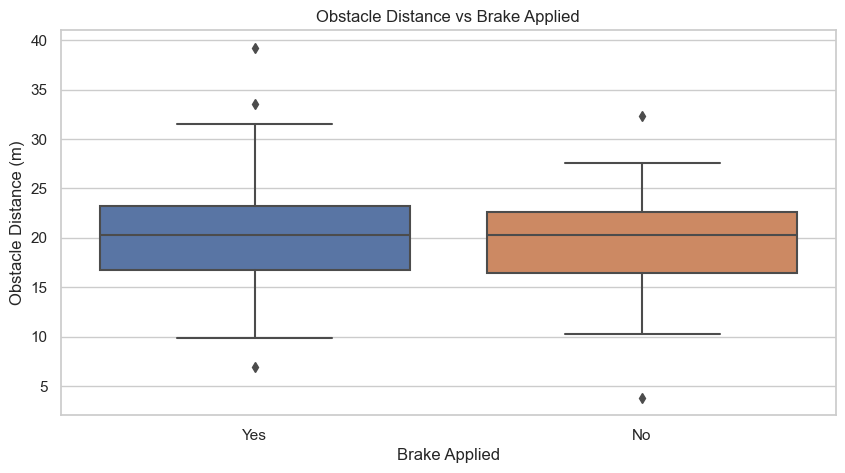

In [72]:
np.random.seed(42)
adas_df['Obstacle_Distance_m'] = np.random.normal(loc=20, scale=5, size=len(adas_df))

plt.figure(figsize=(10, 5))
sns.boxplot(x='Brake_Applied', y='Obstacle_Distance_m', data=adas_df)
plt.title('Obstacle Distance vs Brake Applied')
plt.xlabel('Brake Applied')
plt.ylabel('Obstacle Distance (m)')
plt.show()



### Brake vs VRU Detection


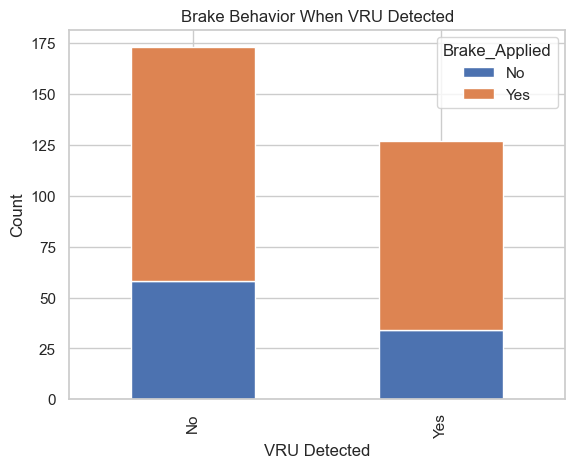

In [73]:
vrus = adas_df.groupby(['VRU_Detected', 'Brake_Applied']).size().unstack()
vrus.plot(kind='bar', stacked=True)
plt.title('Brake Behavior When VRU Detected')
plt.xlabel('VRU Detected')
plt.ylabel('Count')
plt.show()


# 5. Insight: Potential Missed Braking Events


In [74]:
missed_brakes = adas_df[(adas_df['VRU_Detected'] == 1) & (adas_df['Brake_Applied'] == 0)]
print(f"\nNumber of times VRU was detected but brakes were not applied: {len(missed_brakes)}")



Number of times VRU was detected but brakes were not applied: 0


# 6. Sensor Confidence Analysis


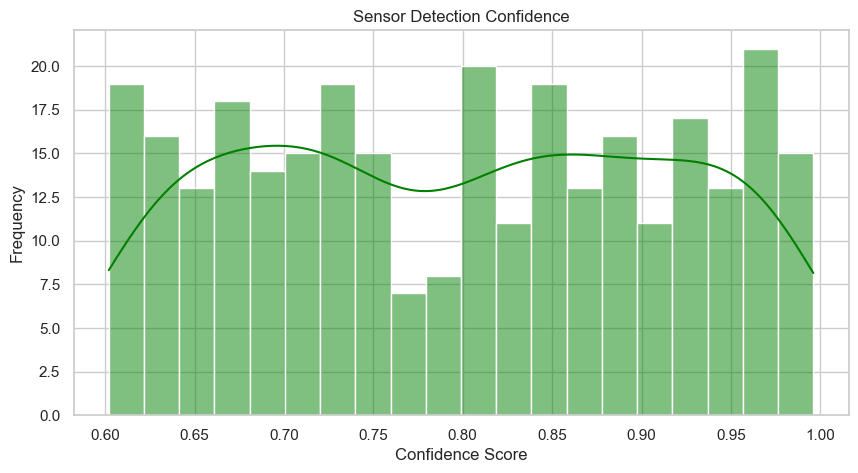

In [75]:
np.random.seed(42)
adas_df['Sensor_Confidence'] = np.random.uniform(0.6, 1.0, size=len(adas_df))
plt.figure(figsize=(10, 5))
sns.histplot(adas_df['Sensor_Confidence'], bins=20, kde=True, color='green')
plt.title('Sensor Detection Confidence')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()


# 7. Save Processed Data for Dashboarding or Further Analysis


In [76]:

adas_df.to_csv("processed_adas_data.csv", index=False)
print("\nAnalysis complete. Processed file saved as 'processed_adas_data.csv'")



Analysis complete. Processed file saved as 'processed_adas_data.csv'
